# Drugs, Dictionaries and Pandas

In this exercise we are going to cover some uses of dictionaries
when using the `pandas` library. Pandas uses dictionaries in many
places — which is not surprising, given they are a fundamental
Python type.

The dataset we will use contains data about global alcohol and drug use disorder deaths. It comes from the [Institute for Health Metrics and Evaluation (IHME) at the University of Washington](https://www.healthdata.org/research-analysis/gbd/collaborator-network). The link to the dataset can found [here](https://ourworldindata.org/grapher/deaths-substance-disorders-who?tab=table).

For these exercises, let's imagine we're working on a presentation about this dataset, and need to perform various data transformations and aggregations in order to generate some plots and before we do some analysis. Dictionaries and lambda functions will come in handy for several aspects of this process.

First, let's get set up.

In [4]:
# please run this cell
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# this imports the machinery for marking answers to questions
from client.api.notebook import Notebook
ok = Notebook('dictionaries_pandas.ok')

Assignment: dictionaries_pandas
OK, version v1.18.1



Next, we import the data:

In [5]:
# Load the data for the exercise.
for_marking = pd.read_csv("deaths-substance-disorders-who.csv").dropna()
mark_string = 'total_Alcohol_deaths_2000_to_2019'

# data from: https://ourworldindata.org/illicit-drug-use
substance = pd.read_csv("deaths-substance-disorders-who.csv").dropna()

# show the first 35 rows of the data
substance.head(35)

,Entity,Code,Year,Deaths - Cause: Alcohol use disorders - Sex: Both sexes - Age_group: ALLAges,Deaths - Cause: Drug use disorders - Sex: Both sexes - Age_group: ALLAges,Deaths - Cause: Opioid use disorders - Sex: Both sexes - Age_group: ALLAges,Deaths - Cause: Cocaine use disorders - Sex: Both sexes - Age_group: ALLAges,Deaths - Cause: Amphetamine use disorders - Sex: Both sexes - Age_group: ALLAges,Deaths - Cause: Other drug use disorders - Sex: Both sexes - Age_group: ALLAges
0,Afghanistan,AFG,2000,99.22,133.27,76.83,4.86,5.49,46.10
1,Afghanistan,AFG,2001,103.40,144.20,83.66,5.34,5.96,49.25
2,Afghanistan,AFG,2002,106.36,158.98,92.46,5.98,6.61,53.92
3,Afghanistan,AFG,2003,108.92,173.35,99.93,6.66,7.33,59.44
4,Afghanistan,AFG,2004,113.88,191.03,110.66,7.35,8.04,64.98
5,Afghanistan,AFG,2005,116.64,204.09,118.83,7.86,8.58,68.82
6,Afghanistan,AFG,2006,118.64,216.12,126.29,8.33,8.99,72.51
7,Afghanistan,AFG,2007,119.41,225.53,132.55,8.64,9.92,74.41
8,Afghanistan,AFG,2008,118.04,229.42,135.89,8.73,9.89,74.91
9,Afghanistan,AFG,2009,115.76,232.17,138.06,8.74,9.95,75.42


The dataframe gives the number of deaths from substance use disorders per country, between the year 2000 and 2019.

You can see that each observational unit (in this case countries) appears in multiple rows of the dataframe (one row for each year from 2000 to 2019).

The column names for this dataset (as with many real world datasets you may work with) are quite messy:

In [6]:
# show the column names
substance.columns

Index(['Entity', 'Code', 'Year',
       'Deaths - Cause: Alcohol use disorders - Sex: Both sexes - Age_group: ALLAges',
       'Deaths - Cause: Drug use disorders - Sex: Both sexes - Age_group: ALLAges',
       'Deaths - Cause: Opioid use disorders - Sex: Both sexes - Age_group: ALLAges',
       'Deaths - Cause: Cocaine use disorders - Sex: Both sexes - Age_group: ALLAges',
       'Deaths - Cause: Amphetamine use disorders - Sex: Both sexes - Age_group: ALLAges',
       'Deaths - Cause: Other drug use disorders - Sex: Both sexes - Age_group: ALLAges'],
      dtype='object')

Remember too that the column names are the default thing that a data frame will give, when asked for a sequence of things, so we can also get the column names with:

In [7]:
# Get the column names as a list
list(substance)

['Entity',
 'Code',
 'Year',
 'Deaths - Cause: Alcohol use disorders - Sex: Both sexes - Age_group: ALLAges',
 'Deaths - Cause: Drug use disorders - Sex: Both sexes - Age_group: ALLAges',
 'Deaths - Cause: Opioid use disorders - Sex: Both sexes - Age_group: ALLAges',
 'Deaths - Cause: Cocaine use disorders - Sex: Both sexes - Age_group: ALLAges',
 'Deaths - Cause: Amphetamine use disorders - Sex: Both sexes - Age_group: ALLAges',
 'Deaths - Cause: Other drug use disorders - Sex: Both sexes - Age_group: ALLAges']

## Question 1

Using the data frame `rename` method, create a dictionary called
`my_renaming_dict` to rename all the columns that begin with `'Deaths - Cause:`
and end with `- Sex: Both sexes - Age_group: ALLAges'`. Rename each column so
that just the cause of death remains in the column name.

So for instance `'Deaths - Cause: Alcohol use disorders - Sex: Both sexes - Age_group: ALLAges'` should be renamed to `Alcohol use disorders`.

And `'Deaths - Cause: Drug use disorders - Sex: Both sexes - Age_group:
ALLAges'` should be renamed to `Drug use disorders` and so on. (For the
marking, please preserve the capitalization, and ensure there are no blank
spaces at the end of each column name string).

After renaming, the values in `substance.columns` should be `['Entity', 'Code',
'Year', 'Alcohol use disorders', 'Drug use disorders', 'Opioid use disorders',
'Cocaine use disorders', 'Amphetamine use disorders', 'Other drug use
disorders']`

**Hint**: you can do this the long-hand manual way, by typing in the entries of
the dict, or you might be able to think of ways of doing this more
automatically, say with a for-loop, and string `replace`..   The long-hand way
is fine though.

**Hint**: If you mess up the column names and want to go back to the originals,
run the first cell in the notebook again.

In [8]:
#- make your dictionary here

my_renaming_dict = {
    'Deaths - Cause: Alcohol use disorders - Sex: Both sexes - Age_group: ALLAges': 'Alcohol use disorders',
    'Deaths - Cause: Drug use disorders - Sex: Both sexes - Age_group: ALLAges': 'Drug use disorders',
    'Deaths - Cause: Opioid use disorders - Sex: Both sexes - Age_group: ALLAges': 'Opioid use disorders',
    'Deaths - Cause: Cocaine use disorders - Sex: Both sexes - Age_group: ALLAges': 'Cocaine use disorders',
    'Deaths - Cause: Amphetamine use disorders - Sex: Both sexes - Age_group: ALLAges': 'Amphetamine use disorders',
    'Deaths - Cause: Other drug use disorders - Sex: Both sexes - Age_group: ALLAges': 'Other drug use disorders'
}


print(my_renaming_dict)
#- Then apply the renaming dict to rename the columns.
substance = substance.rename(columns=my_renaming_dict)
# show the dataframe, with the renamed columns
substance.head()

{'Deaths - Cause: Alcohol use disorders - Sex: Both sexes - Age_group: ALLAges': 'Alcohol use disorders', 'Deaths - Cause: Drug use disorders - Sex: Both sexes - Age_group: ALLAges': 'Drug use disorders', 'Deaths - Cause: Opioid use disorders - Sex: Both sexes - Age_group: ALLAges': 'Opioid use disorders', 'Deaths - Cause: Cocaine use disorders - Sex: Both sexes - Age_group: ALLAges': 'Cocaine use disorders', 'Deaths - Cause: Amphetamine use disorders - Sex: Both sexes - Age_group: ALLAges': 'Amphetamine use disorders', 'Deaths - Cause: Other drug use disorders - Sex: Both sexes - Age_group: ALLAges': 'Other drug use disorders'}


,Entity,Code,Year,Alcohol use disorders,Drug use disorders,Opioid use disorders,Cocaine use disorders,Amphetamine use disorders,Other drug use disorders
0,Afghanistan,AFG,2000,99.22,133.27,76.83,4.86,5.49,46.10
1,Afghanistan,AFG,2001,103.40,144.20,83.66,5.34,5.96,49.25
2,Afghanistan,AFG,2002,106.36,158.98,92.46,5.98,6.61,53.92
3,Afghanistan,AFG,2003,108.92,173.35,99.93,6.66,7.33,59.44
4,Afghanistan,AFG,2004,113.88,191.03,110.66,7.35,8.04,64.98


In [9]:
# run this cell to check your answer
_ = ok.grade('q1')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



## Question 2

For ease of reference, your colleague would like you to make a dictionary which links each country in the `Entity` column to the corresponding code in the `Code` column.

The country names in the `Entity` column should be the keys of the dictionary, and the values should be the country identification codes from the `Code` column.

Your dictionary should be called `country_codes_dict` and once its completed, the first few key value pairs should look like this:

`{'Afghanistan': 'AFG',
 'Albania': 'ALB',
 'Algeria': 'DZA',
 'Angola': 'AGO',
 'Antigua and Barbuda': 'ATG',`

**Hint**: there are various ways of doing this, some rather fancy, and some not.  As usual, generally prefer the less-fancy ways, or at least, the ways which are most easy to read and understand.

**Hint**: For one way of solving this, you might consider using a `for` loop.
The `unique` method of a Pandas Series may also be useful.

In [10]:
country_codes_dict = {}
for country in substance['Entity'].unique():
    filtered_df = substance[substance['Entity'] == country]
    code = filtered_df['Code'].iloc[0]
    country_codes_dict[country] = code
# show the dictionary
country_codes_dict

{'Afghanistan': 'AFG',
 'Albania': 'ALB',
 'Algeria': 'DZA',
 'Angola': 'AGO',
 'Antigua and Barbuda': 'ATG',
 'Argentina': 'ARG',
 'Armenia': 'ARM',
 'Australia': 'AUS',
 'Austria': 'AUT',
 'Azerbaijan': 'AZE',
 'Bahamas': 'BHS',
 'Bahrain': 'BHR',
 'Bangladesh': 'BGD',
 'Barbados': 'BRB',
 'Belarus': 'BLR',
 'Belgium': 'BEL',
 'Belize': 'BLZ',
 'Benin': 'BEN',
 'Bhutan': 'BTN',
 'Bolivia': 'BOL',
 'Bosnia and Herzegovina': 'BIH',
 'Botswana': 'BWA',
 'Brazil': 'BRA',
 'Brunei': 'BRN',
 'Bulgaria': 'BGR',
 'Burkina Faso': 'BFA',
 'Burundi': 'BDI',
 'Cambodia': 'KHM',
 'Cameroon': 'CMR',
 'Canada': 'CAN',
 'Cape Verde': 'CPV',
 'Central African Republic': 'CAF',
 'Chad': 'TCD',
 'Chile': 'CHL',
 'China': 'CHN',
 'Colombia': 'COL',
 'Comoros': 'COM',
 'Congo': 'COG',
 'Costa Rica': 'CRI',
 "Cote d'Ivoire": 'CIV',
 'Croatia': 'HRV',
 'Cuba': 'CUB',
 'Cyprus': 'CYP',
 'Czechia': 'CZE',
 'Democratic Republic of Congo': 'COD',
 'Denmark': 'DNK',
 'Djibouti': 'DJI',
 'Dominican Republic': 'D

In [11]:
# run this cell to check your answer
_ = ok.grade('q2')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



## Question 3

So that you can quickly retrieve rows from the dataframe, your colleague would
like you to write a function which takes two arguments: `year` which should be
an `int` like `2010`, and `country_code` which should be a string like `"AFG"`.

Your function should be called `get_year_for_country_func` and it should return
the row of the `substance` dataframe which corresponds to the `year` and
`country_code` with which it was supplied. So for instance
`get_year_for_country_func(2009, 'AFG')` should return the data for Afghanistan
in the year 2009.

In [12]:
# Write your function here
def get_year_for_country_func(year, country_code):
    # You can use the `substance` data frame variable in the function
    yr = substance['Year']
    code = substance['Code']
    needed = (yr == year) & (code == country_code)
    row = substance[needed]
    return row
# test the function with an example couple of values.
get_year_for_country_func(2009, 'AFG')

,Entity,Code,Year,Alcohol use disorders,Drug use disorders,Opioid use disorders,Cocaine use disorders,Amphetamine use disorders,Other drug use disorders
9,Afghanistan,AFG,2009,115.76,232.17,138.06,8.74,9.95,75.42


In [13]:
# run this cell to check your answer
_ = ok.grade('q3a')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



Now, for some reason, your colleague is insisting that this should not be
a full named function, as you wrote above, but it should be a lambda function.
Again it should take two arguments, `year` and `country_code`, and it should
return the rows from `substance` corresponding to that year and country code.
How would you write your function above as a lambda function?

Call the lambda function `get_year_for_country`.

In [14]:
#- write your lambda function here
get_year_for_country = lambda year,country_code : substance[(substance['Year'] == year) & (substance['Code'] == country_code)]
# test the function
get_year_for_country(2009, 'AFG')

,Entity,Code,Year,Alcohol use disorders,Drug use disorders,Opioid use disorders,Cocaine use disorders,Amphetamine use disorders,Other drug use disorders
9,Afghanistan,AFG,2009,115.76,232.17,138.06,8.74,9.95,75.42


In [15]:
# run this cell to check your answer
_ = ok.grade('q3')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



## Question 4

For your analysis, you'd like to calculate the total deaths from alcohol, for
each country, for all the years in the dataset (2000 - 2019).

Write a function which takes a country code (like `RUS` for Russia,`ZWE`
for Zimbabwe etc.) and returns the total number of deaths from alcohol for that
country, across all the years (2000 - 2019).

*Note*: the deaths from alcohol, for each country, for each year, are in the
`Alcohol use disorders` column of the `substance` dataframe.

**Hint**: don't forget you'll need to add up all the deaths for the years
2000-2019 to get the answer we need.

In [16]:
# write your standard (not-lambda) function here
def total_alcohol_deaths_for_country_func(country_code):
    needed = (substance['Code'] == country_code) & (substance['Alcohol use disorders'] > 0)
    total = substance[needed]['Alcohol use disorders'].sum()
    return total
# test the function
total_alcohol_deaths_for_country_func('AFG')

2415.34

In [17]:
# run this cell to check your answer
_ = ok.grade('q4a')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



Your colleague is out of control.  They want you to write this function as a lambda function as well.   Call this lambda function `total_alcohol_deaths_for_country`:

In [18]:
#- write your lambda function here
total_alcohol_deaths_for_country = lambda country_code : substance[substance['Code'] == country_code]['Alcohol use disorders'].sum()
# test the function
total_alcohol_deaths_for_country('AFG')

2415.34

In [19]:
# run this cell to check your answer
_ = ok.grade('q4')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



## Question 5

We will now use our function to build a dataframe which shows the 2000 - 2019
total alcohol deaths for each country, along with each country's name and
identifier code (e.g. `AFG`, `RUS` etc).

We'll use a dictionary to create our dataframe, by passing it to `pd.DataFrame`.

As you remember, if we pass a `dict` to `pd.DataFrame`, the keys become the column names, and the values become the columns.  So, each value of our passed dictionary should be a sequence of some sort, to give the sequence of values for the corresponding column.

Create a dictionary called `dict_to_make_totals_by_country_df`, which should
have two keys (one for each column), and each corresponding value will be
a sequence containing the values for that column.

One key (soon to become a column) should be called `Country`, and the values
associated with it should be the *names* of the countries which are currently
stored in the `country_codes_dict`.

The other key should be called `Code` and its values should be the country
*codes* which are currently stored in the `country_codes_dict`.

This dictionary will be used to construct a dataframe called
`totals_per_country` in the lines of code at the end of the cell below:

You may want to remind yourself of the contents of the `country_codes_dict`:

In [20]:
country_codes_dict

{'Afghanistan': 'AFG',
 'Albania': 'ALB',
 'Algeria': 'DZA',
 'Angola': 'AGO',
 'Antigua and Barbuda': 'ATG',
 'Argentina': 'ARG',
 'Armenia': 'ARM',
 'Australia': 'AUS',
 'Austria': 'AUT',
 'Azerbaijan': 'AZE',
 'Bahamas': 'BHS',
 'Bahrain': 'BHR',
 'Bangladesh': 'BGD',
 'Barbados': 'BRB',
 'Belarus': 'BLR',
 'Belgium': 'BEL',
 'Belize': 'BLZ',
 'Benin': 'BEN',
 'Bhutan': 'BTN',
 'Bolivia': 'BOL',
 'Bosnia and Herzegovina': 'BIH',
 'Botswana': 'BWA',
 'Brazil': 'BRA',
 'Brunei': 'BRN',
 'Bulgaria': 'BGR',
 'Burkina Faso': 'BFA',
 'Burundi': 'BDI',
 'Cambodia': 'KHM',
 'Cameroon': 'CMR',
 'Canada': 'CAN',
 'Cape Verde': 'CPV',
 'Central African Republic': 'CAF',
 'Chad': 'TCD',
 'Chile': 'CHL',
 'China': 'CHN',
 'Colombia': 'COL',
 'Comoros': 'COM',
 'Congo': 'COG',
 'Costa Rica': 'CRI',
 "Cote d'Ivoire": 'CIV',
 'Croatia': 'HRV',
 'Cuba': 'CUB',
 'Cyprus': 'CYP',
 'Czechia': 'CZE',
 'Democratic Republic of Congo': 'COD',
 'Denmark': 'DNK',
 'Djibouti': 'DJI',
 'Dominican Republic': 'D

On to the question:

In [21]:
dict_to_make_totals_by_country_df = {**{'Country': list(country_codes_dict.keys())}, **{'Code': list(country_codes_dict.values())}}
# create a dataframe, using the dictionary you just created
totals_per_country = pd.DataFrame(dict_to_make_totals_by_country_df)

# show the dataframe
totals_per_country

,Country,Code
0,Afghanistan,AFG
1,Albania,ALB
2,Algeria,DZA
3,Angola,AGO
4,Antigua and Barbuda,ATG
...,...,...
179,Vietnam,VNM
180,World,OWID_WRL
181,Yemen,YEM
182,Zambia,ZMB


In [22]:
# run this cell to check your answer
_ = ok.grade('q5')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 5
    Failed: 0
[ooooooooook] 100.0% passed



## Question 6

Make a new column in the `totals_per_country` dataframe which contains the *total deaths from alcohol use* for each country, between 2000 and 2019 inclusive. The new column should be called `total_Alcohol_deaths_2000_to_2019`.

**Hint**: You will very likely want to
[apply](https://lisds.github.io/textbook/functions-conditionals/apply_functions.html)
your previous function or lambda function to do this work.

**Hint**: Be careful — which data frame are you getting the country codes from?

In [25]:
totals_per_country['total_Alcohol_deaths_2000_to_2019'] = totals_per_country['Code'].apply(total_alcohol_deaths_for_country)
# show the dataframe
totals_per_country.head(20)

,Country,Code,total_Alcohol_deaths_2000_to_2019
0,Afghanistan,AFG,2415.34
1,Albania,ALB,372.32
2,Algeria,DZA,1495.02
3,Angola,AGO,3566.08
4,Antigua and Barbuda,ATG,38.66
5,Argentina,ARG,12292.25
6,Armenia,ARM,41.38
7,Australia,AUS,6408.30
8,Austria,AUT,8716.08
9,Azerbaijan,AZE,4360.22


In [26]:
# run this cell to check your answer
_ = ok.grade('q6')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



## Question 7

Create a dataframe called `totals_per_country_sorted_by_alc` which sorts the data in the `totals_per_country` dataframe by `total_Alcohol_deaths_2000_to_2019`, in *descending* order (highest value first):

In [30]:
totals_per_country_sorted_by_alc = totals_per_country.sort_values('total_Alcohol_deaths_2000_to_2019', ascending=False)
# show the sorted dataframe
totals_per_country_sorted_by_alc 

,Country,Code,total_Alcohol_deaths_2000_to_2019
180,World,OWID_WRL,3137042.73
135,Russia,RUS,776220.06
75,India,IND,389930.76
34,China,CHN,377845.12
174,United States,USA,187186.29
...,...,...,...
165,Tonga,TON,16.06
144,Seychelles,SYC,12.12
87,Kiribati,KIR,10.83
101,Maldives,MDV,10.69


In [31]:
# run this cell to check your answer
_ = ok.grade('q7')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



## Question 8

Oops, if you look at the first row of `totals_per_country_sorted_by_alc` you'll see that it is the global total (`Country == 'World'`), rather than corresponding to a specific country.

Remove just the row where `Country == 'World'` from the dataframe, using any method you like, so that the dataframe contains only country-level data.

In [32]:
totals_per_country_sorted_by_alc = totals_per_country_sorted_by_alc.drop(0)
# show the sorted dataframe (with the 'World' row removed)
totals_per_country_sorted_by_alc

,Country,Code,total_Alcohol_deaths_2000_to_2019
135,Russia,RUS,776220.06
75,India,IND,389930.76
34,China,CHN,377845.12
174,United States,USA,187186.29
171,Ukraine,UKR,185218.15
...,...,...,...
165,Tonga,TON,16.06
144,Seychelles,SYC,12.12
87,Kiribati,KIR,10.83
101,Maldives,MDV,10.69


In [33]:
# run this cell to check your answer
_ = ok.grade('q8')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



In order to present the data to some colleagues, you need to display the data
in the `totals_per_country_sorted_by_alc` dataframe in a more digestible way.

Using the first 20 rows of the `totals_per_country_sorted_by_alc` dataframe, create a horizontal barplot with the country names on the vertical axis and the total alcohol deaths on the horizontal axis. (Because the data is sorted in descending order, using the first 20 rows will show the data for the countries with the highest deaths from alcohol between 2000 and 2019).

Here is a picture of how the top of your plot should look:

![](images/graph_example.png)

**Hint**: Don't forget to work on the top 20 countries.

**Hint**: You might want to investigate the arguments to the `plot.barh` method
of the data frame.

<Axes: ylabel='Country'>

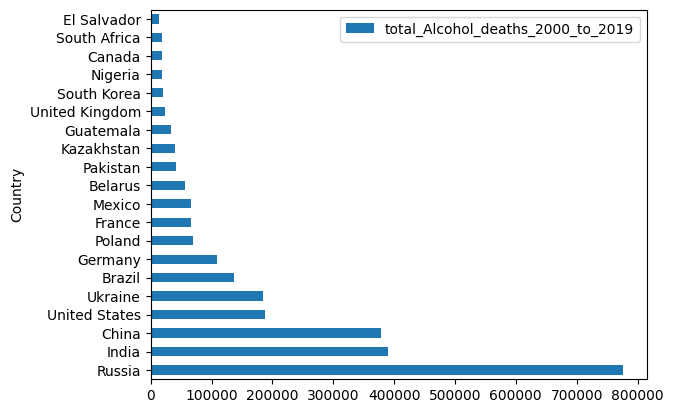

In [34]:
#- your plot here
totals_per_country_sorted_by_alc[:20].plot.barh(x='Country',y='total_Alcohol_deaths_2000_to_2019')

## Question 9

For your analysis, you need to also calculate the total number of deaths from cocaine use from the year 2000 to 2019, for each country.

Create a new column in the `totals_per_country_sorted_by_alc` data frame called `"total_Cocaine_deaths_2000_to_2019"`, which contains the total deaths from cocaine use between 2000 and 2019, for each country. 

**Hint** Use a lambda or not-lambda function and the `apply` method of the data
frame in order to do this.

**Hint** Look at your solution above for the alcohol deaths to get started.

In [35]:
#- create your new column, using a function and the pandas apply method, here.
#totals_per_country['total_Alcohol_deaths_2000_to_2019'] = totals_per_country['Code'].apply(total_alcohol_deaths_for_country)
#total_alcohol_deaths_for_country = lambda country_code : substance[substance['Code'] == country_code]['Alcohol use disorders'].sum()
total_cocaine_deaths_for_country = lambda country_code : substance[substance['Code'] == country_code]['Cocaine use disorders'].sum()

totals_per_country_sorted_by_alc['total_Cocaine_deaths_2000_to_2019'] = totals_per_country_sorted_by_alc['Code'].apply(total_cocaine_deaths_for_country)
# show the dataframe, with the new column
totals_per_country_sorted_by_alc

,Country,Code,total_Alcohol_deaths_2000_to_2019,total_Cocaine_deaths_2000_to_2019
135,Russia,RUS,776220.06,14179.29
75,India,IND,389930.76,4448.35
34,China,CHN,377845.12,4197.04
174,United States,USA,187186.29,58327.44
171,Ukraine,UKR,185218.15,1739.56
...,...,...,...,...
165,Tonga,TON,16.06,0.00
144,Seychelles,SYC,12.12,0.00
87,Kiribati,KIR,10.83,0.00
101,Maldives,MDV,10.69,0.51


In [36]:
# run this cell to check your answer
_ = ok.grade('q9')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



## Question 10

Create a scatterplot with `total_Alcohol_deaths_2000_to_2019` on the x axis and `total_Cocaine_deaths_2000_to_2019` on the y axis. 

<Axes: xlabel='total_Alcohol_deaths_2000_to_2019', ylabel='total_Cocaine_deaths_2000_to_2019'>

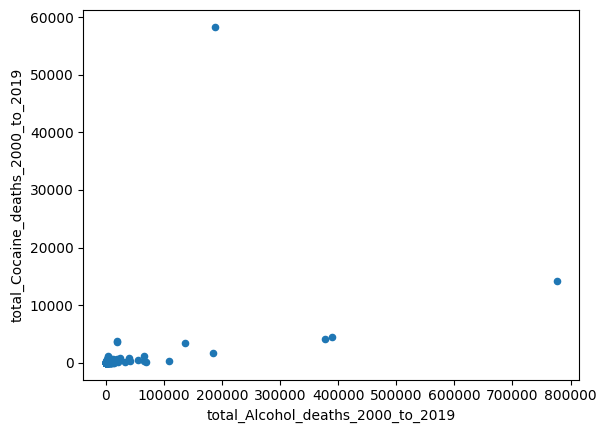

In [38]:
#- your graph here
totals_per_country_sorted_by_alc.plot.scatter(x='total_Alcohol_deaths_2000_to_2019', y='total_Cocaine_deaths_2000_to_2019')


In the cell below, write a brief paragraph of a few sentences about what you
think the graph shows about the relationship between total alcohol deaths and
total cocaine deaths.

*The graph shows there is a correlation between alcohol and cocoaine deaths with an outlier. If a country has an alchohol misue problem, it may also be likley to have a cocaine one.*

## Question 11

To see if your assessment of the graphical relationship was correct, use any method you'd like to calculate the correlation (Pearson's $r$) between `total_Alcohol_deaths_2000_to_2019` and `total_Cocaine_deaths_2000_to_2019`.

Store your answer in a variable called `alc_coca_r`:

**Hint**: Remember [correlation](https://lisds.github.io/textbook/mean-slopes/Correlation.html)?

In [42]:
def standard_units(a):
    """ array to standard units """
    return (a - np.mean(a) / np.std(a))

def correlation(t, x_name, y_name):
    """ Correlation by calculation """
    x = t[x_name]
    y = t[y_name]
    return np.mean(standard_units(x) * standard_units(y))

alc_coca_r = correlation(totals_per_country_sorted_by_alc, 'total_Alcohol_deaths_2000_to_2019', 'total_Cocaine_deaths_2000_to_2019')

In [43]:
# run this cell to check your answer
_ = ok.grade('q11')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Question > Suite 1 > Case 1

>>> # Your correlation coefficient is not correct!
>>> np.isclose(alc_coca_r, 0.413897930223489, atol = 2)
False

# Error: expected
#     True
# but got
#     False

Run only this test case with "python3 ok -q q11 --suite 1 --case 1"
---------------------------------------------------------------------
Test summary
    Passed: 0
    Failed: 1
[k..........] 0.0% passed



In [ ]:
# For your convenience, you can run this cell to run all the tests at once!
import os
_ = [ok.grade(q[:-3]) for q in os.listdir("tests") if q.startswith('q')]